In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
df=pd.read_csv('/content/spam[1].csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.shape

(5572, 2)

In [5]:
df.dtypes

Category    object
Message     object
dtype: object

In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

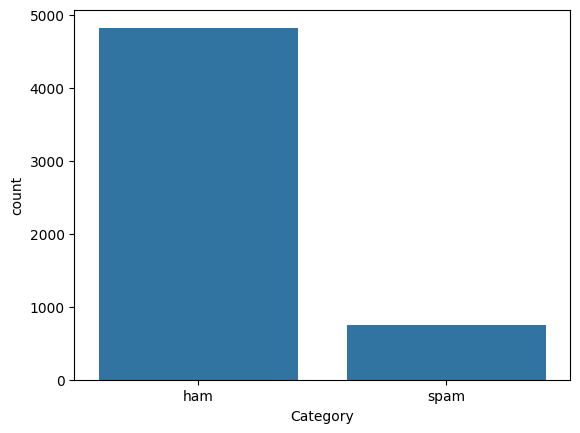

In [9]:
sns.countplot(x='Category',data=df)

In [10]:
df['Category']=df['Category'].map({'ham':1,'spam':0})
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [11]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
tweets=df.Message
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [13]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [14]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [15]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join({w for w in word_tokenize(x) if len(w)>=3}))
tweets

0       Available buffet got until amore point world g...
1                                  wif Joking oni lar ...
2       Cup wkly 08452810075 tkts 21st May txt entry r...
3                      hor then say dun ... early already
4         think usf here n't lives Nah around goes though
                              ...                        
5567    claim the time minute Pound 2nd have Only cont...
5568                            going esplanade home Will
5569     mood that Pity was suggestions any other ... for
5570    else did and week free next bitching The guy b...
5571                               Rofl its name true Its
Name: Message, Length: 5572, dtype: object

In [16]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       avail buffet got until amor point world great ...
1                                    wif joke oni lar ...
2       cup wkli 08452810075 tkts 21st may txt entri r...
3                      hor then say dun ... earli alreadi
4           think usf here n't live nah around goe though
                              ...                        
5567    claim the time minut pound 2nd have onli conta...
5568                                go esplanad home will
5569         mood that piti was suggest ani other ... for
5570    els did and week free next bitch the guy but a...
5571                                 rofl it name true it
Name: Message, Length: 5572, dtype: object

In [17]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets


0       avail buffet got amor point world great bugi o...
1                                    wif joke oni lar ...
2       cup wkli 08452810075 tkts 21st may txt entri r...
3                           hor say dun ... earli alreadi
4                think usf n't live nah around goe though
                              ...                        
5567    claim time minut pound 2nd onli contact bt-nat...
5568                                     go esplanad home
5569                            mood piti suggest ani ...
5570    els week free next bitch guy act interest buy ...
5571                                       rofl name true
Name: Message, Length: 5572, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data

<5572x7095 sparse matrix of type '<class 'numpy.float64'>'
	with 44702 stored elements in Compressed Sparse Row format>

In [19]:
train_data.shape

(5572, 7095)

In [20]:
print(train_data)

  (0, 6779)	0.20203047130059745
  (0, 1824)	0.3089717384520193
  (0, 3643)	0.3657318424884653
  (0, 2026)	0.28323413617381227
  (0, 4610)	0.17518120543397994
  (0, 1596)	0.3089717384520193
  (0, 3076)	0.20165655308257646
  (0, 6953)	0.24517543868729555
  (0, 4915)	0.249729434431227
  (0, 1053)	0.3657318424884653
  (0, 3038)	0.16954368353003973
  (0, 1594)	0.34913057628928906
  (0, 1240)	0.2757692060536668
  (1, 3777)	0.44014690307313215
  (1, 4608)	0.5892230337773975
  (1, 3612)	0.49506982696691904
  (1, 6876)	0.4625935436300812
  (2, 2845)	0.14130996035784382
  (2, 809)	0.27050662177555607
  (2, 1125)	0.2048423120004671
  (2, 418)	0.2780365518110838
  (2, 1915)	0.23826309832696083
  (2, 6886)	0.17694622546205907
  (2, 5131)	0.20206720547226056
  (2, 6233)	0.14437978299471715
  :	:
  (5567, 1829)	0.20193503131166762
  (5567, 4796)	0.22663155057988257
  (5567, 4610)	0.17477199961925954
  (5568, 2551)	0.782681381846728
  (5568, 3000)	0.43953417232463426
  (5568, 3278)	0.4407034897404325


In [21]:
x=train_data
x

<5572x7095 sparse matrix of type '<class 'numpy.float64'>'
	with 44702 stored elements in Compressed Sparse Row format>

In [22]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<3900x7095 sparse matrix of type '<class 'numpy.float64'>'
	with 31472 stored elements in Compressed Sparse Row format>

In [24]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
gd=GridSearchCV(clf,param,cv=10,scoring='accuracy')
gd.fit(x_train,y_train)
print(gd.best_params_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

In [ ]:
label=[1,0]
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
print(mat)
dis.plot()

In [ ]:
score=accuracy_score(y_test,y_pred)
score

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtc=DecisionTreeClassifier(max_depth=1)
abc=AdaBoostClassifier(base_estimator=dtc,n_estimators=50)
abc.fit(x_train,y_train)
y_pred1=abc.predict(x_test)
y_pred1

In [ ]:
mat1=confusion_matrix(y_test,y_pred)
mat1

In [ ]:
score1=accuracy_score(y_test,y_pred)
score1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy')
lr=LogisticRegression(solver='saga',max_iter=100,class_weight='balanced')

In [ ]:
lst=[rfc,lr]
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print(confusion_matrix(y_test,y_predict))
  print(accuracy_score(y_test,y_predict))
  print(classification_report(y_test,y_predict))